In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


In [4]:
# b. Load the training and testing data (MNIST)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data: Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)


In [6]:
# c. Define the network architecture using Keras

model = Sequential([
    # Flatten the 28x28 images into 784-dimensional vectors
    Flatten(input_shape=(28, 28)),

    # First hidden layer with 128 neurons and ReLU activation
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    # Dropout layer to prevent overfitting
    Dropout(0.2),

    # Output layer with 10 neurons (one for each digit 0-9)
    # Softmax activation gives probabilities for each class
    Dense(10, activation="softmax")
])

'''model = Sequential([
    Conv2D(32, (3,3), activation='relu',
           kernel_regularizer=regularizers.l2(0.001),
           input_shape=(28,28,1)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
]) '''

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# d. Train the model using SGD

model.compile(
    optimizer='sgd',  # Using Stochastic Gradient Descent (SGD)
    loss='sparse_categorical_crossentropy', # Good for multi-class classification
    metrics=['accuracy'] # Precision(),Recall() # must be called as a class
)

# Train the model
print("\nStarting model training...")
history = model.fit(
    x_train,
    y_train,
    epochs=10,            # Train for 10 cycles
    batch_size=32,        # Use batches of 32 images
    validation_data=(x_test, y_test), #To get val_accuracy and val_loss
    verbose=1,            # Print progress
)


Starting model training...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9770 - loss: 0.0735 - val_accuracy: 0.9748 - val_loss: 0.0808
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9797 - loss: 0.0687 - val_accuracy: 0.9746 - val_loss: 0.0828
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9788 - loss: 0.0710 - val_accuracy: 0.9748 - val_loss: 0.0797
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9810 - loss: 0.0654 - val_accuracy: 0.9749 - val_loss: 0.0798
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9824 - loss: 0.0616 - val_accuracy: 0.9758 - val_loss: 0.0769
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9805 - loss: 0.0650 - val_accuracy: 0.9760 - val_loss: 0.0762
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9830 - loss: 0.0578 - val_accuracy: 0.9765 - val_loss: 0.0750
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accura

In [16]:
# e. Evaluate the network

print("\nEvaluating model on test data...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"\nTest accuracy: {test_acc*100:.4f}")
print(f"Test loss: {test_loss:.4f}")


Evaluating model on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0860

Test accuracy: 97.7000
Test loss: 0.0742


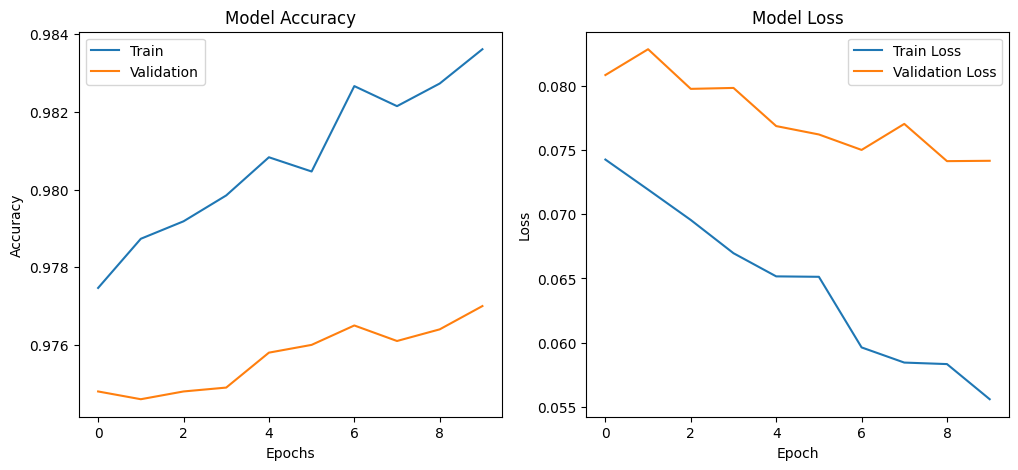

In [17]:
# f. Plot the training loss and accuracy

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()